In [1]:
 # Import libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from matplotlib.colors import ListedColormap # Allows create palette from a list of co
 import seaborn as sns
 sns.set(style = "whitegrid")
 # Import libraries for scalling data and PCA
 from sklearn.preprocessing import StandardScaler, MinMaxScaler
 from sklearn.decomposition import PCA
 from sklearn.preprocessing import OneHotEncoder, LabelEncoder
 # Import libraries for building model
 from imblearn.over_sampling import SMOTE
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import layers
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import roc_curve, auc
 from sklearn.metrics import precision_recall_curve
 from sklearn.metrics import confusion_matrix
 from imblearn.under_sampling import RandomUnderSampler
 from tensorflow.keras import backend as K
 from sklearn.metrics import f1_score
 from sklearn.impute import SimpleImputer

 print(tf.__version__)

2.16.1


In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

#  1. EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# Show the basic info about the dataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


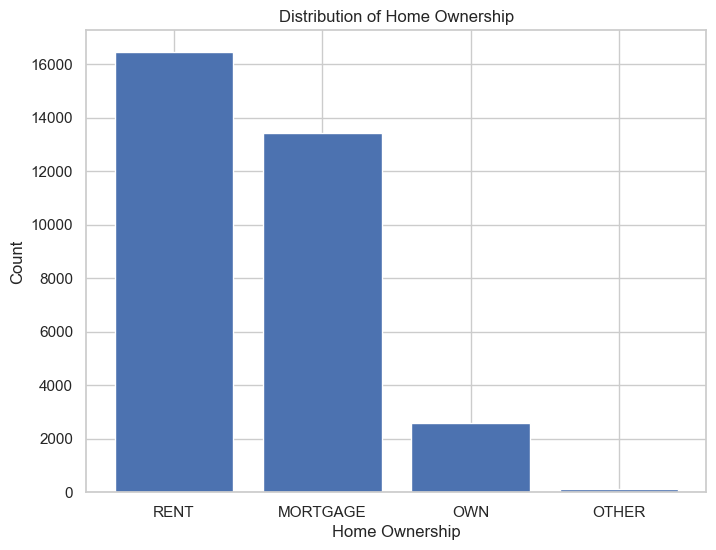

In [4]:
# person_home_ownership
print(df['person_home_ownership'].value_counts())

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['person_home_ownership'].value_counts().index, df['person_home_ownership'].value_counts().values)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.show()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


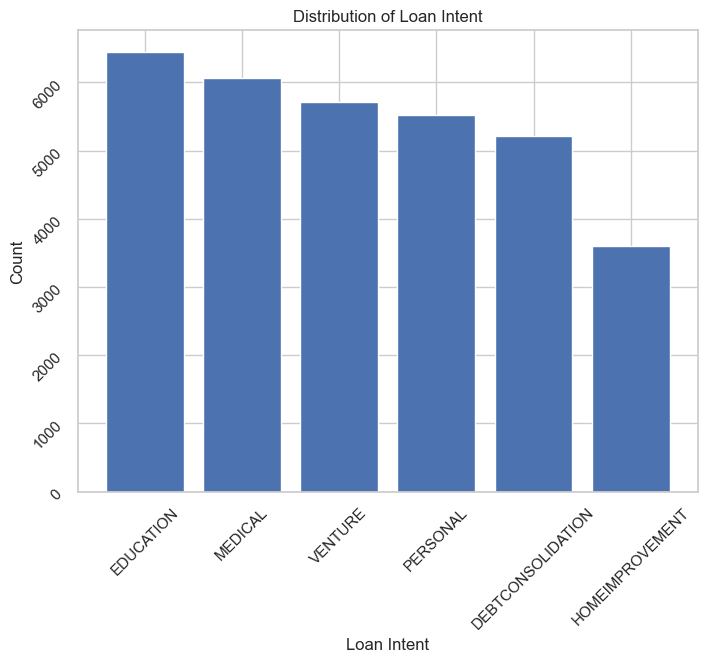

In [5]:
# loan_intent
print(df['loan_intent'].value_counts())

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['loan_intent'].value_counts().index, df['loan_intent'].value_counts().values)
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Distribution of Loan Intent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()


loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


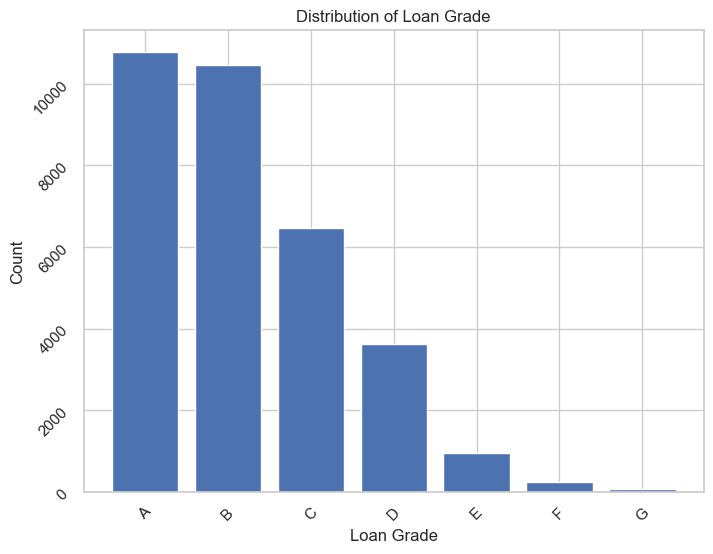

In [6]:
# Print value counts for loan_grade
print(df['loan_grade'].value_counts())

# Plotting for loan_grade
plt.figure(figsize=(8, 6))
plt.bar(df['loan_grade'].value_counts().index, df['loan_grade'].value_counts().values)
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()


cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


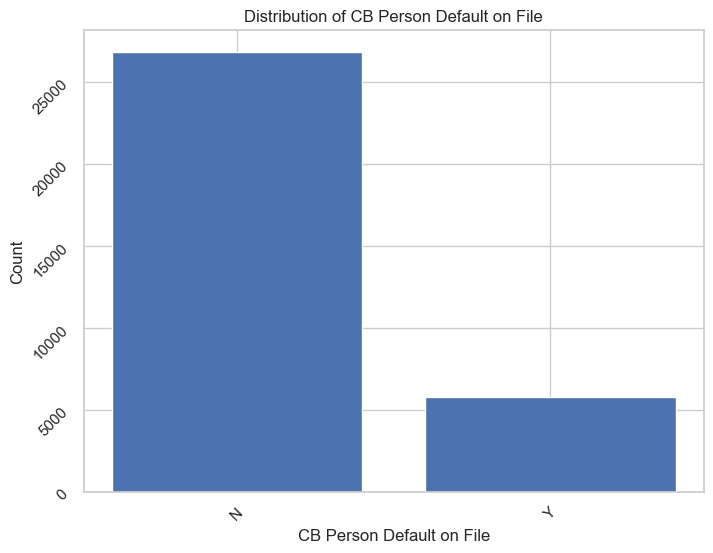

In [7]:
# Print value counts for cb_person_default_on_file
print(df['cb_person_default_on_file'].value_counts())

# Plotting for cb_person_default_on_file
plt.figure(figsize=(8, 6))
plt.bar(df['cb_person_default_on_file'].value_counts().index, df['cb_person_default_on_file'].value_counts().values)
plt.xlabel('CB Person Default on File')
plt.ylabel('Count')
plt.title('Distribution of CB Person Default on File')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()


loan_status
0    25473
1     7108
Name: count, dtype: int64


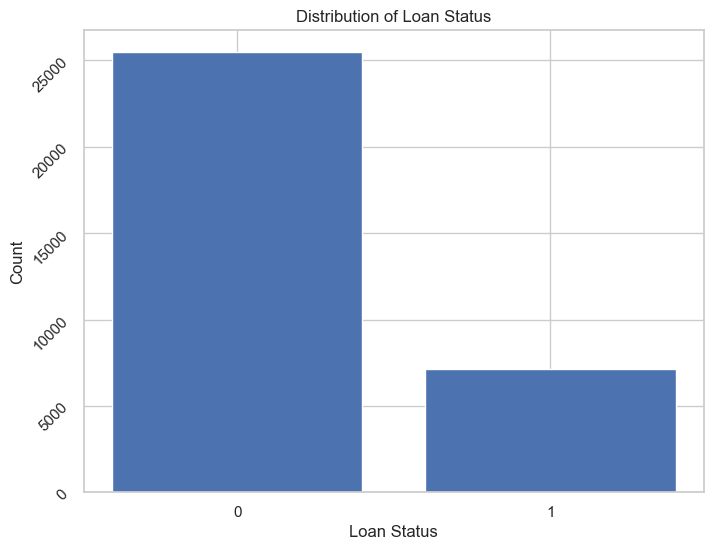

In [8]:
# Print value counts for loan_status
print(df['loan_status'].value_counts())

# Plotting for loan_status
plt.figure(figsize=(8, 6))
plt.bar([0, 1], df['loan_status'].value_counts().values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks([0, 1])  # Set x-ticks to be 0 and 1
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()

In [9]:
# Basic statistics
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [10]:
 # Check if any value is N/A
 df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# Drop N/A values
df.dropna(inplace = True)

In [12]:
 # Check if any value is duplicated
 df.duplicated().sum()

137

In [13]:
 # Drop repeat values
 df.drop_duplicates(inplace = True)

In [14]:
# Identify continuous numerical features based on their data type (numeric)
continuous_features = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Identify categorical or discrete features based on their data type (object) or specific criteria
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'loan_status' from continuous_features and add it to categorical_features
if 'loan_status' in continuous_features:
    continuous_features.remove('loan_status')
    categorical_features.append('loan_status')

# Print the lists
print('Continuous numerical features:', continuous_features)
print('Categorical or discrete features:', categorical_features)


Continuous numerical features: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical or discrete features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']


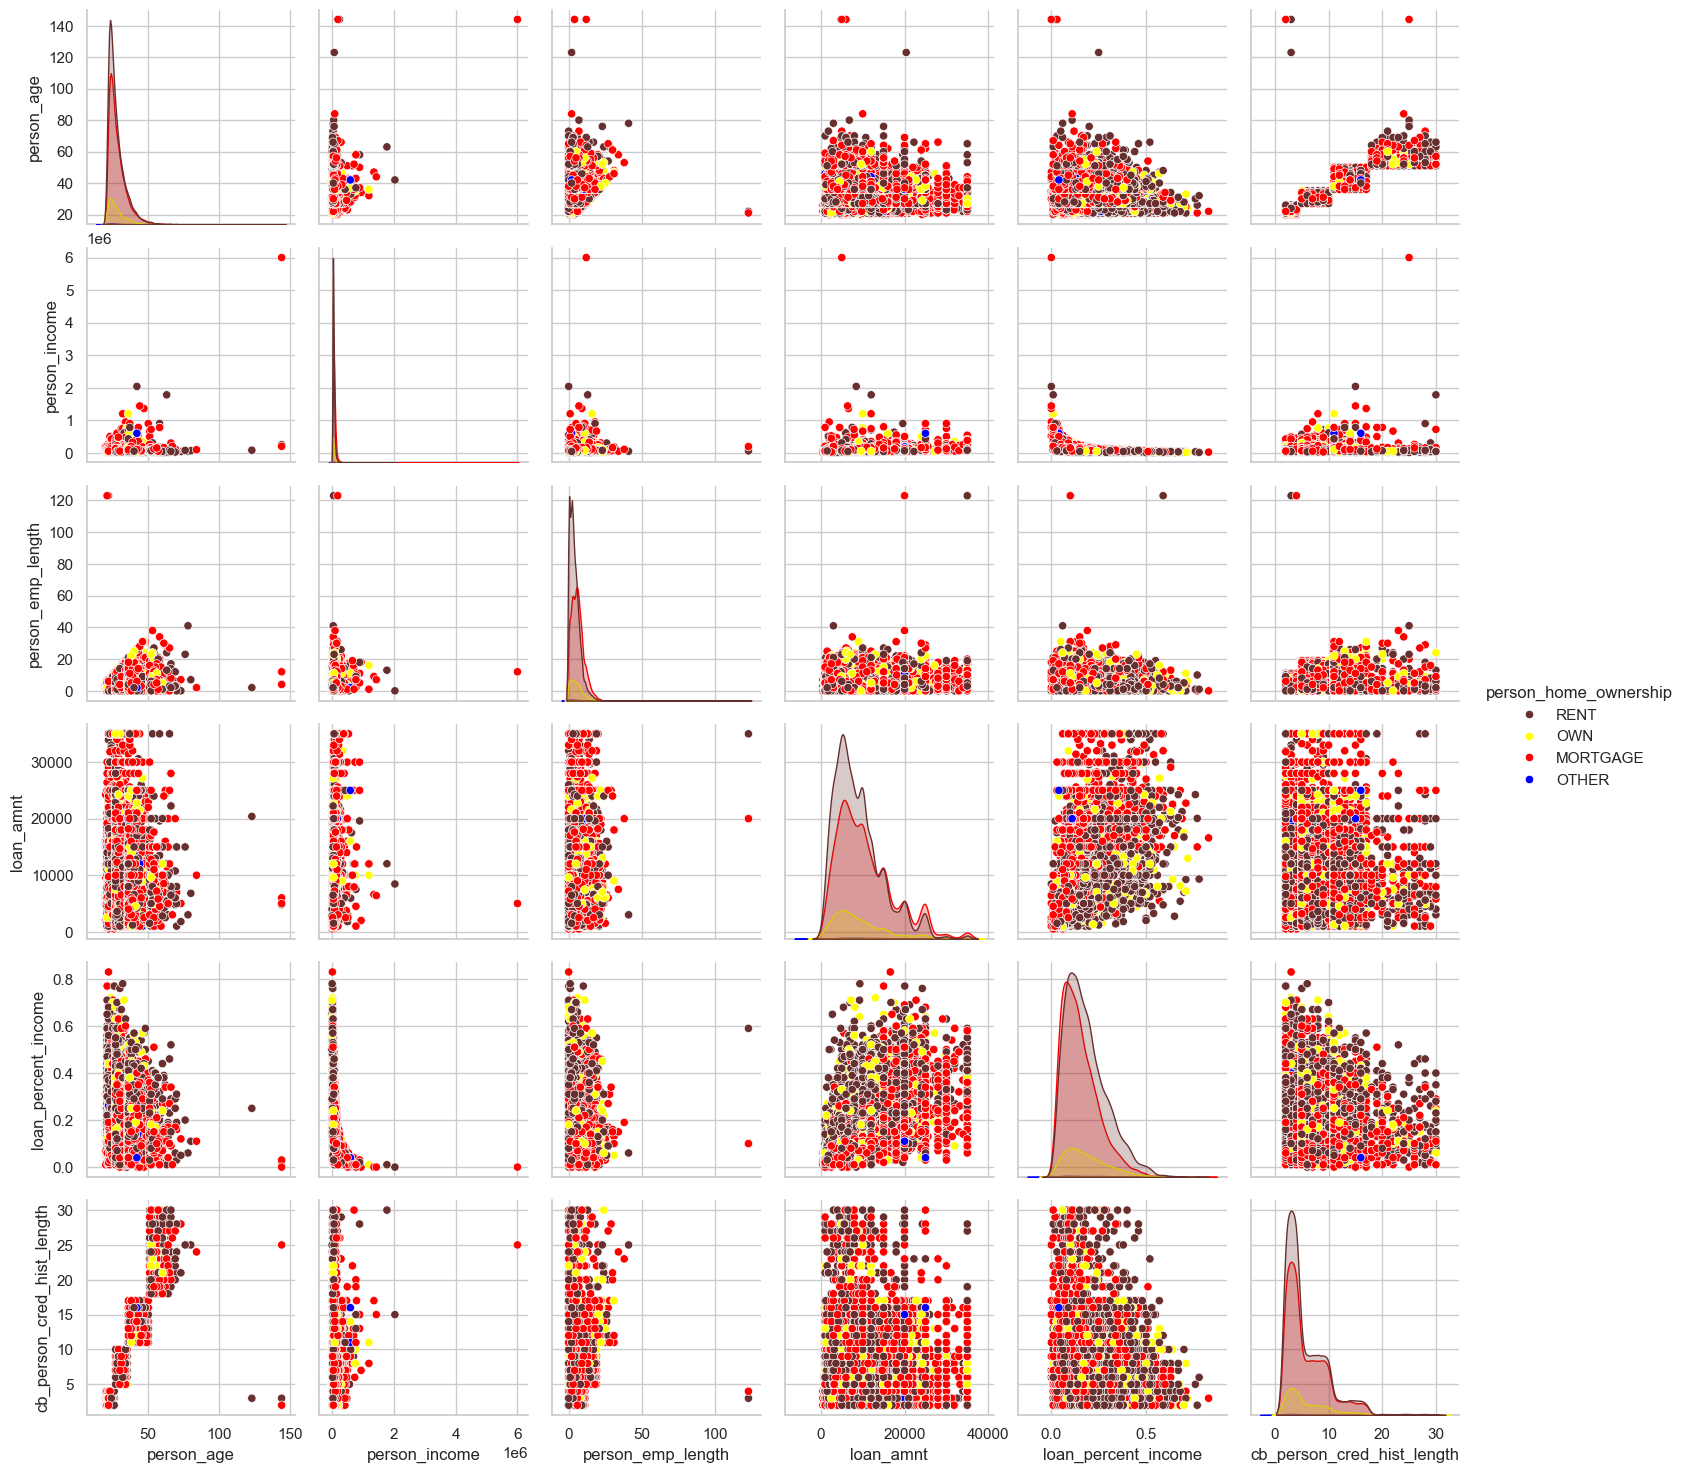

In [15]:
# Create a pairplot to visualize the relationships between continuous numerical features
# and 'person_home_ownership' in the dataset.

# Remove 'loan_int_rate' from continuous features
col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']

# Add 'person_home_ownership' to the list of continuous features for pairplot
to_plot = col_cont_minus_loan_int_rate + ['person_home_ownership']

# Create pairplot
sns.pairplot(df[to_plot], hue='person_home_ownership', palette=["#682F2F", "yellow", "red", "blue"])
plt.show()

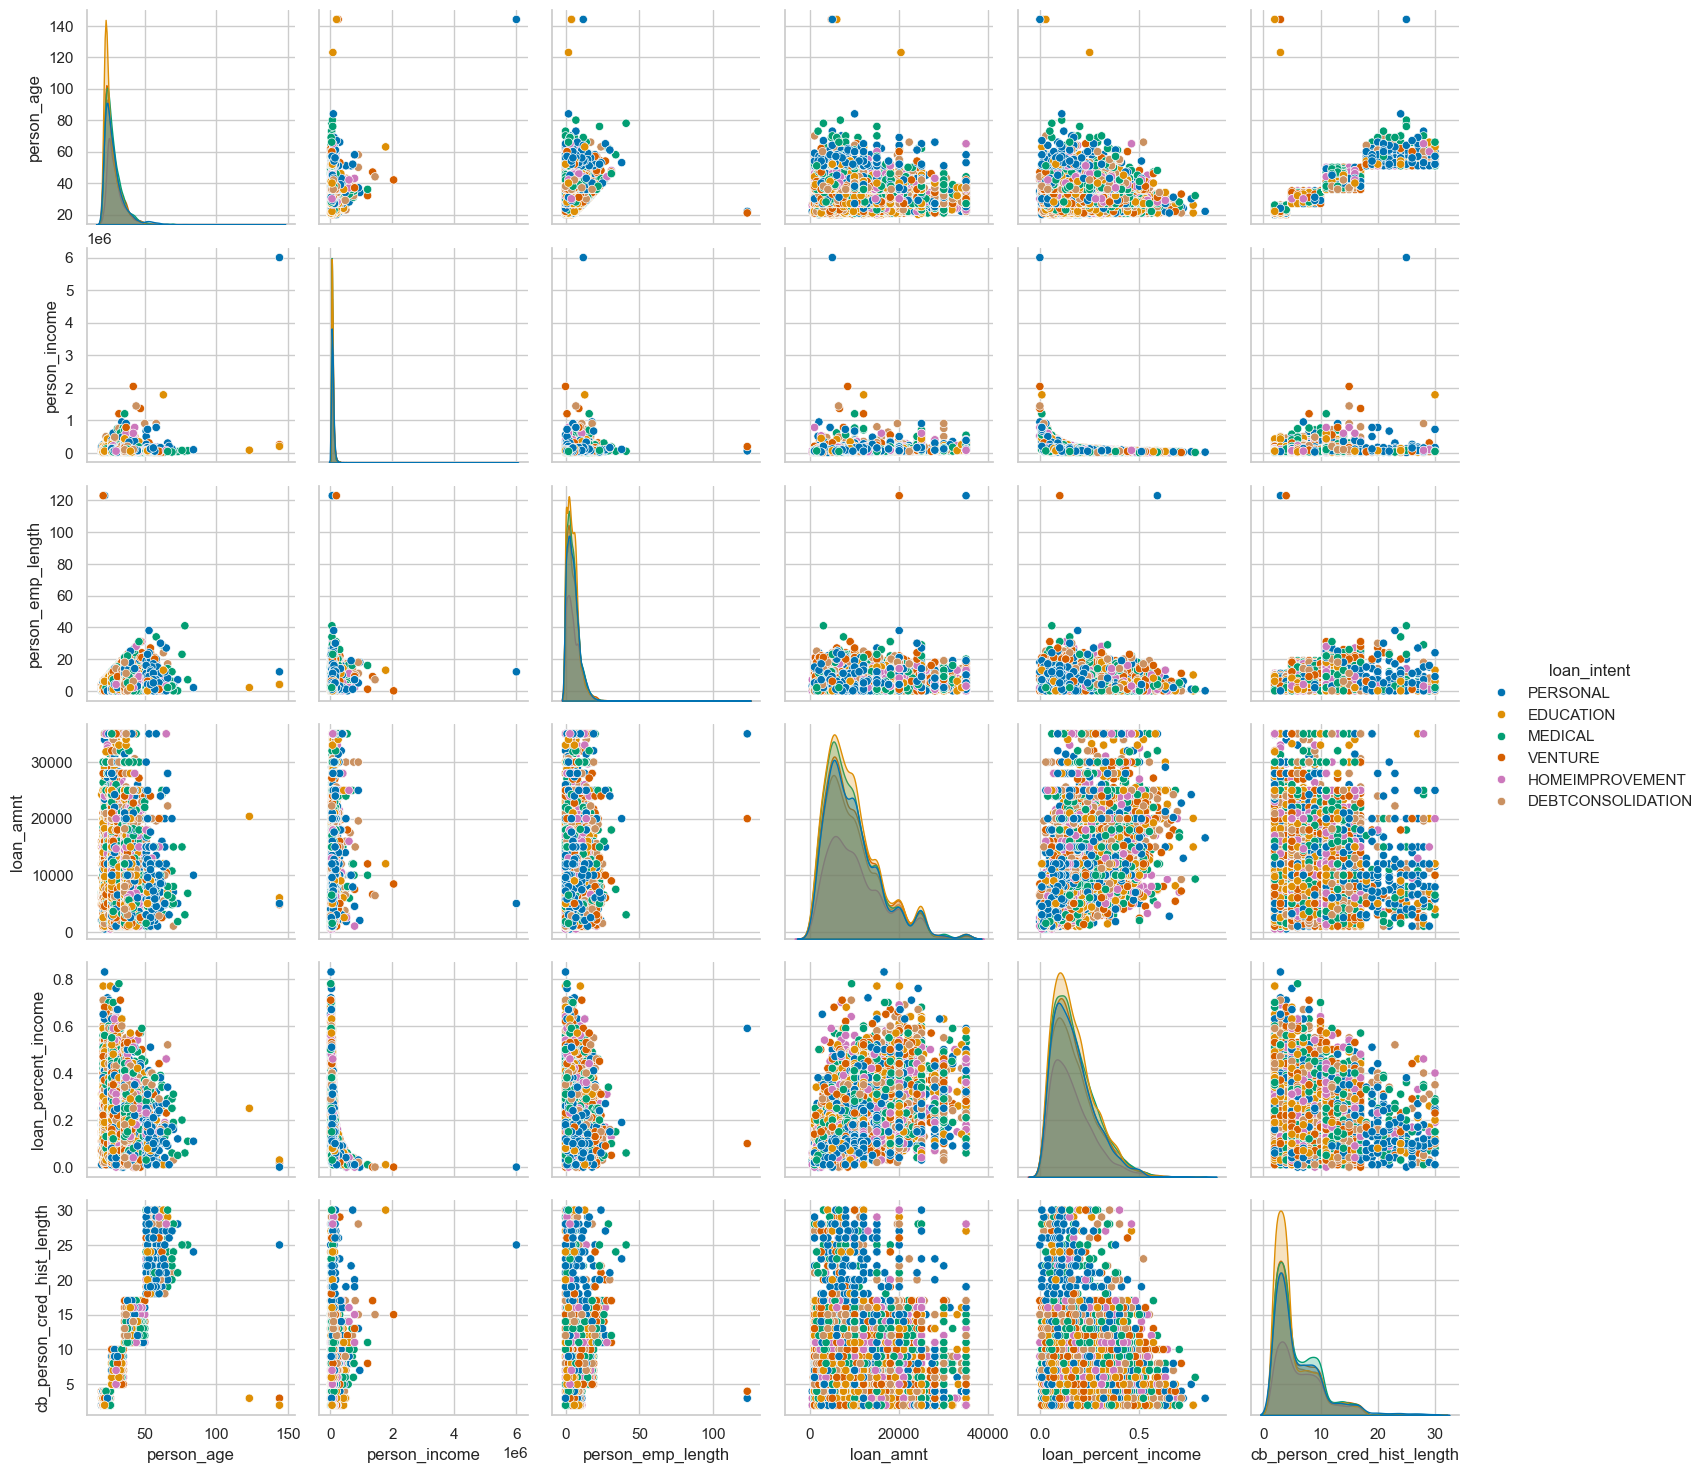

In [16]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'loan_intent' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['loan_intent']
sns.pairplot(df[to_plot], hue = 'loan_intent', palette= ('colorblind'))

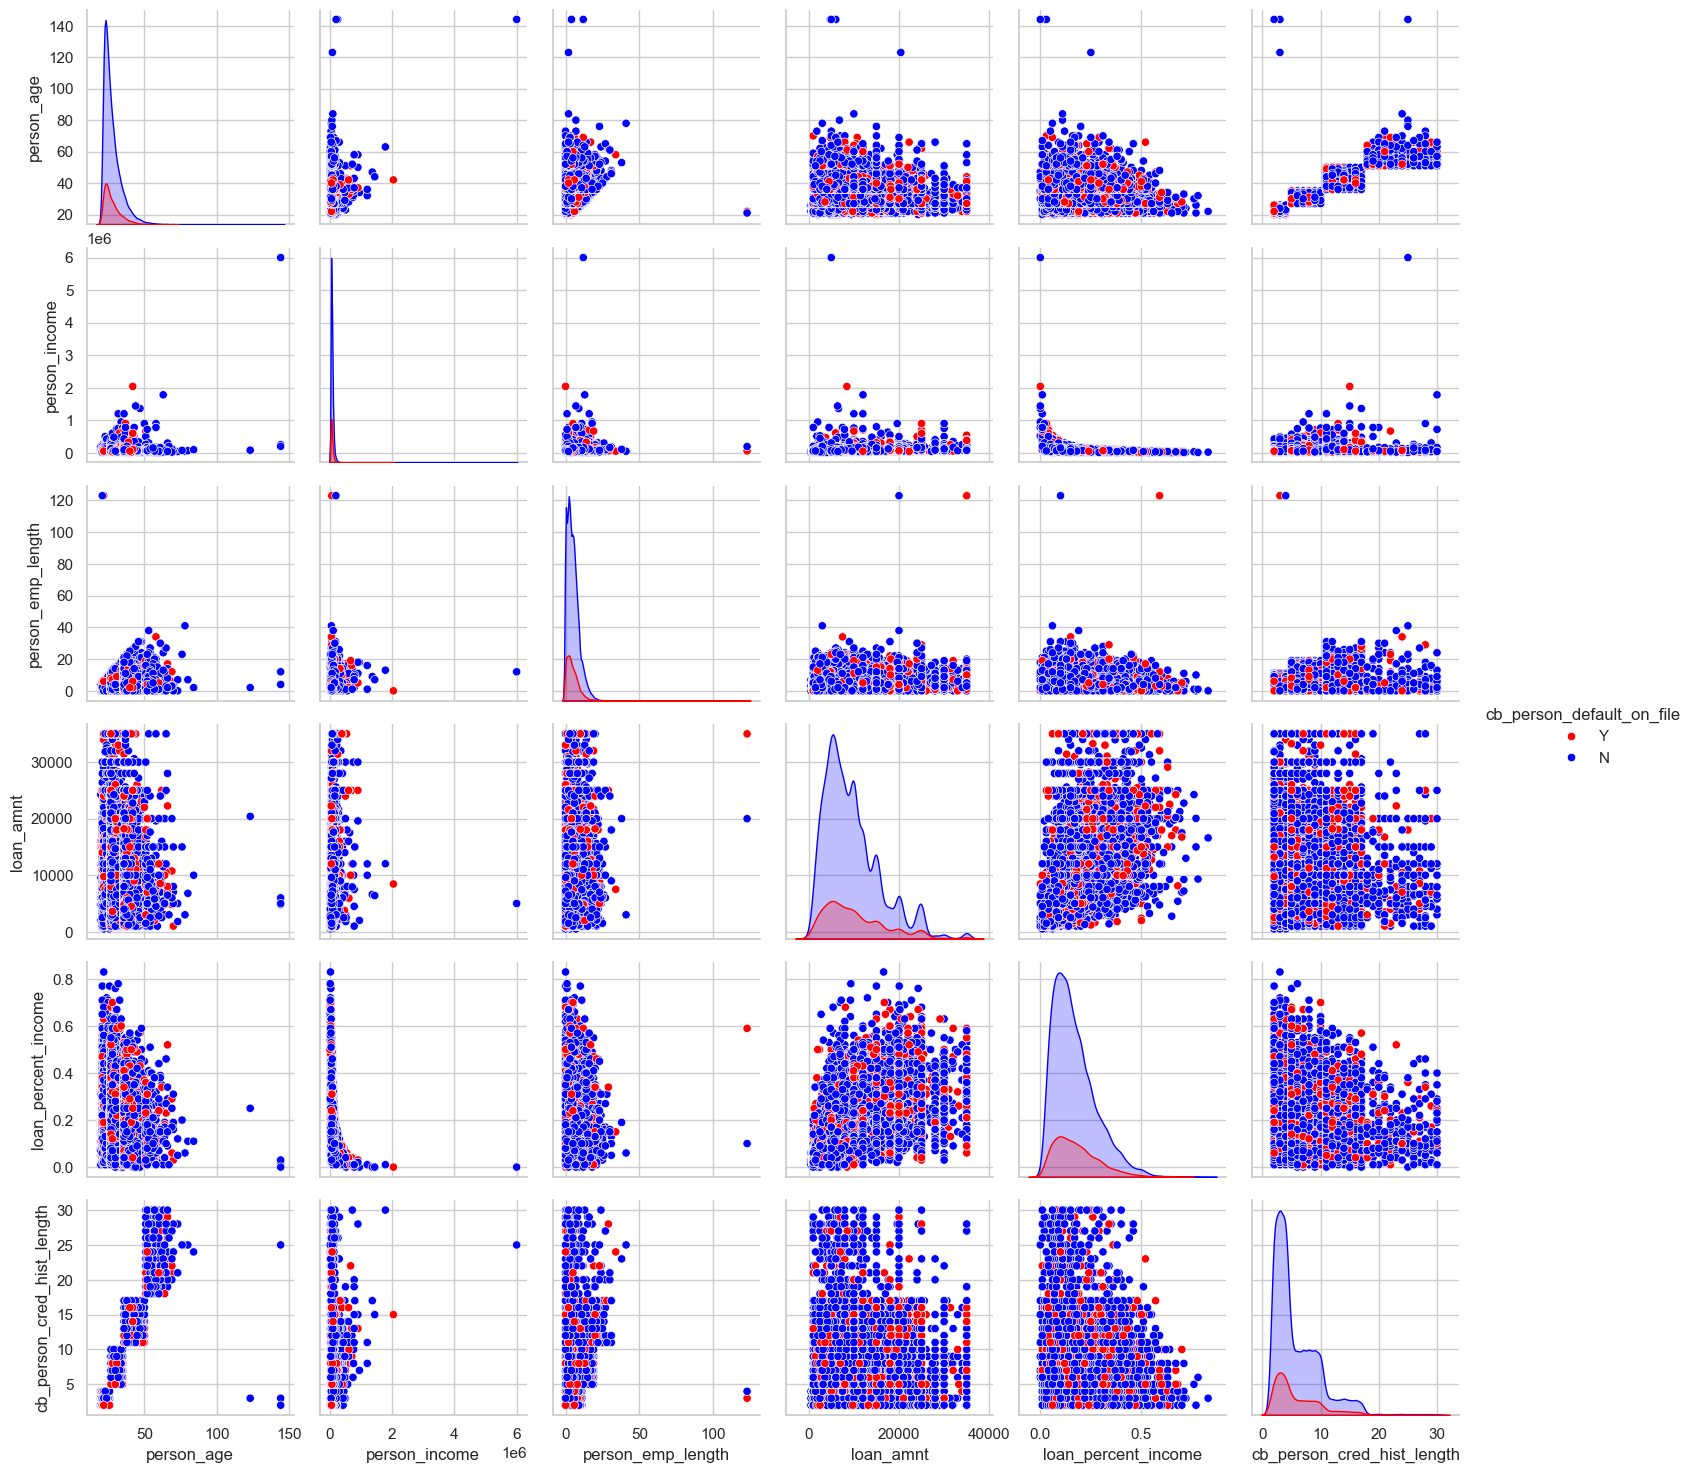

In [17]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'cb_person_default_on_file' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']
sns.pairplot(df[to_plot], hue = 'cb_person_default_on_file' , palette= (["red", "blue"]))

In [19]:
# Drop outliers in person_age
df = df[df['person_age'] < 90]

In [20]:
# Drop otliers in person_emp_lenght
df = df[df['person_emp_length'] < 60]

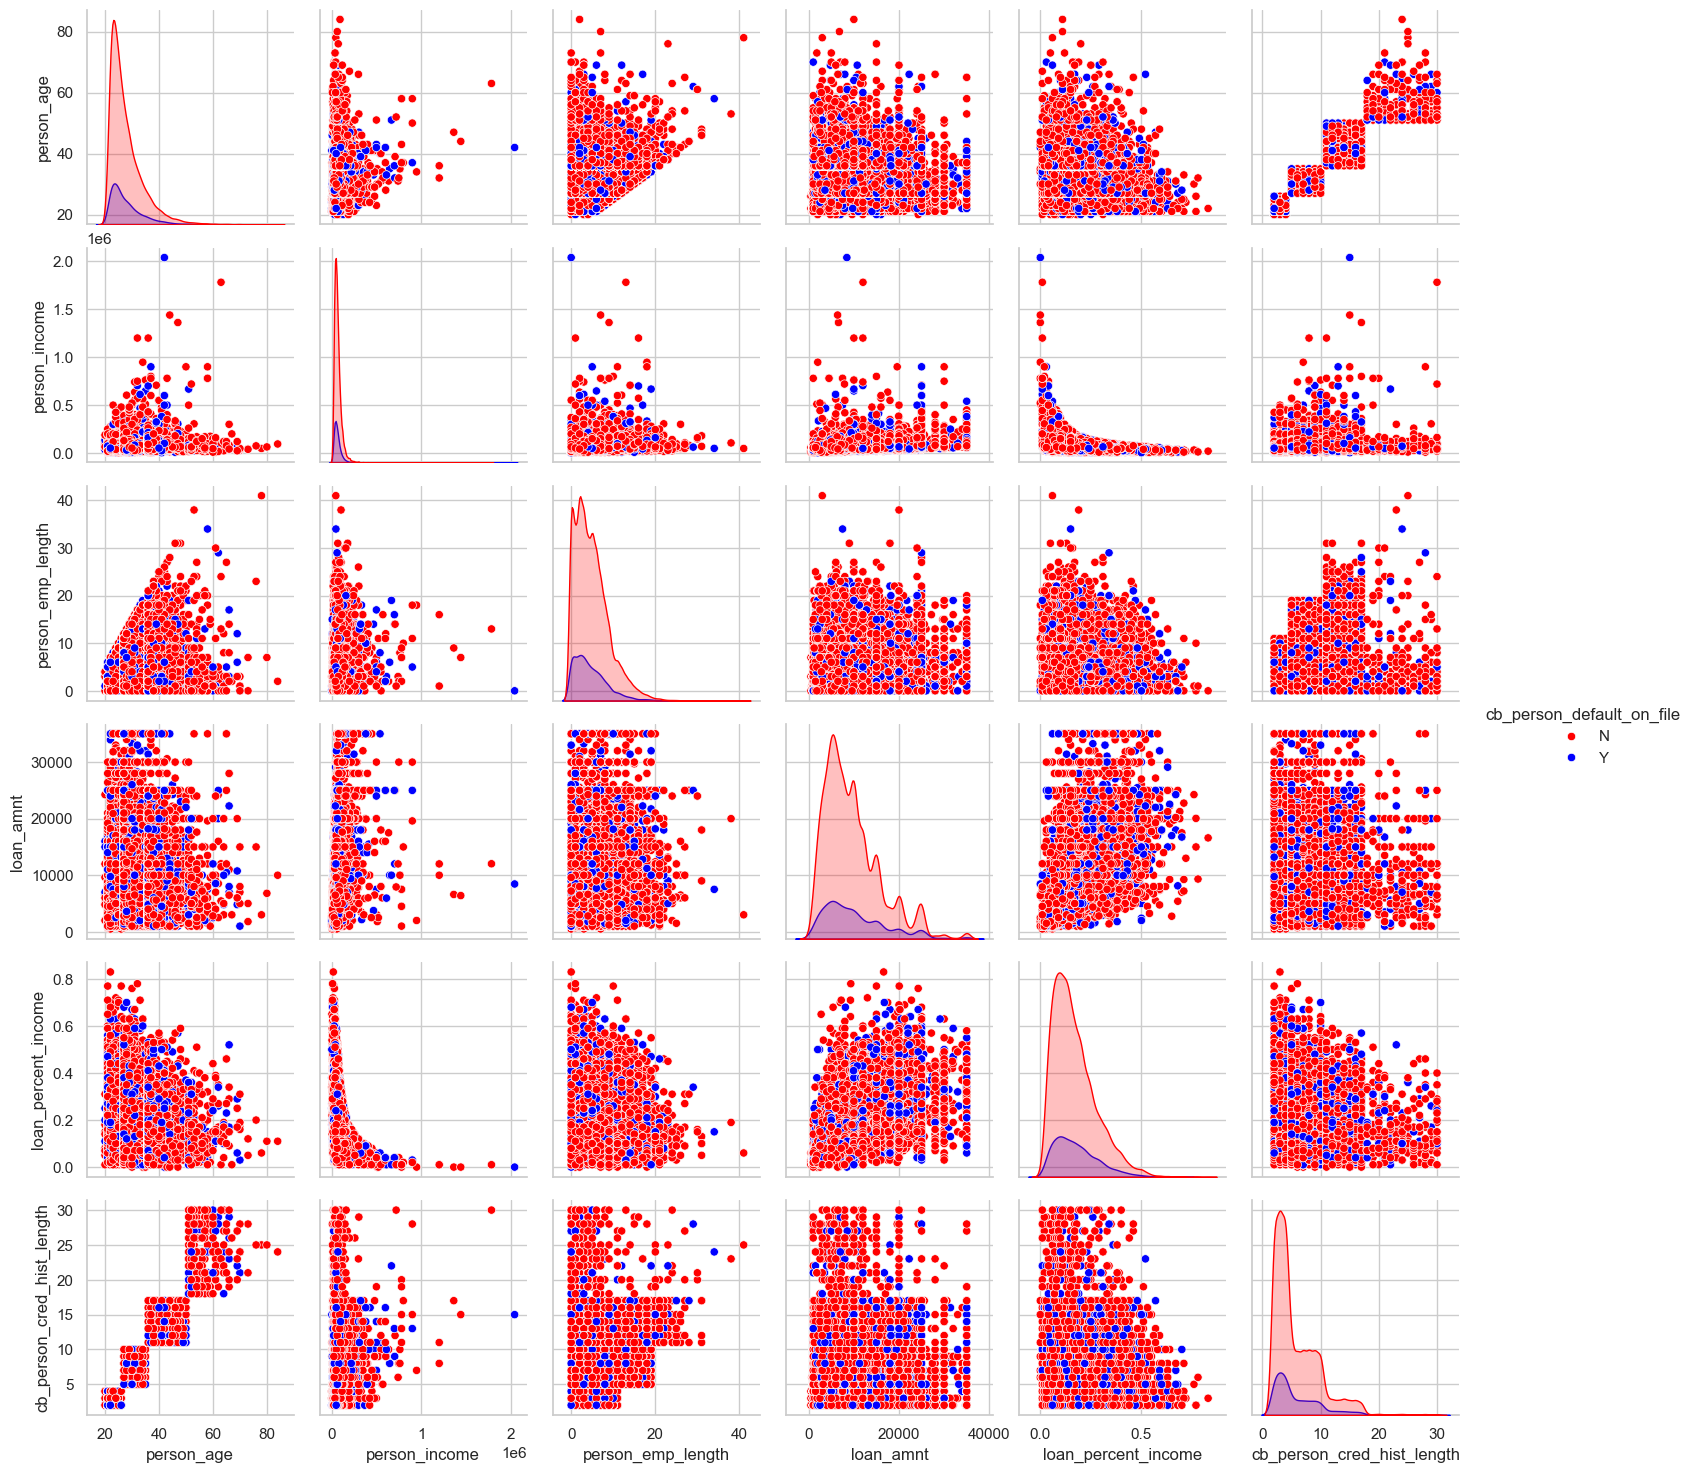

In [21]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'cb_person_default_on_file' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']
sns.pairplot(df[to_plot], hue = 'cb_person_default_on_file' , palette= (["red", "blue"]))

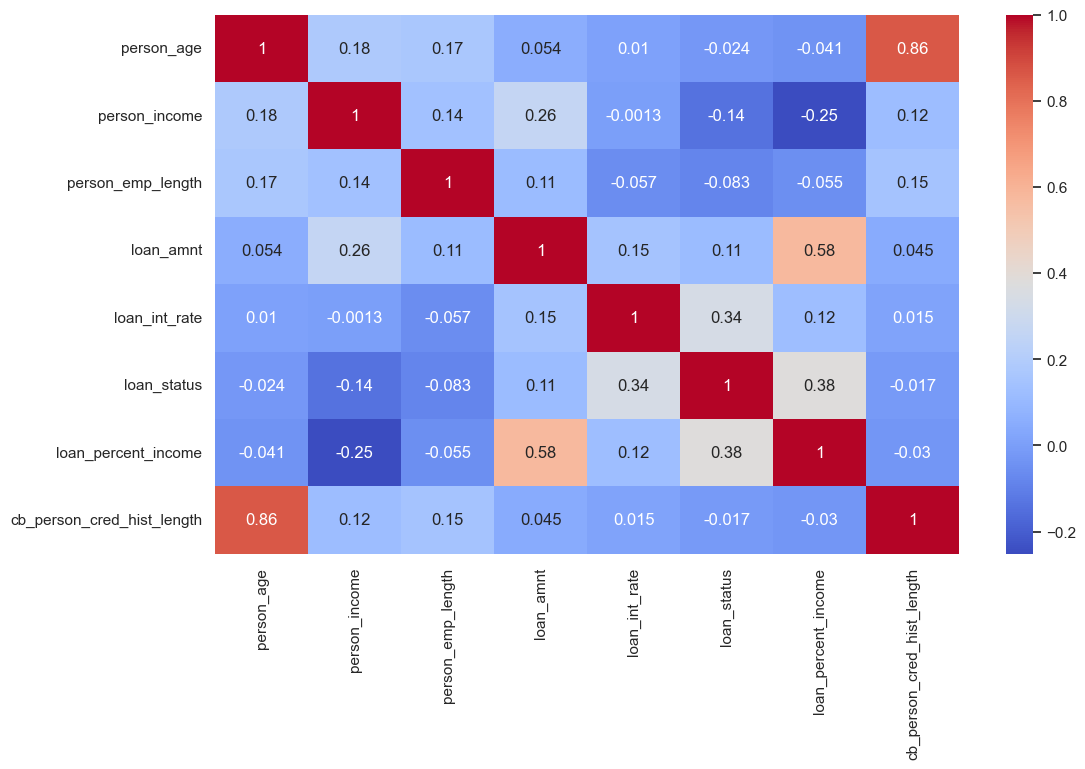

In [18]:
# Create the correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

## 2. DATA PREPROCESSING

In [22]:
# Obtain categorical variables
le = LabelEncoder()

# Transform categorical variables (except loan_grade)
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

# One-hot encode loan_grade
df = pd.get_dummies(df, columns=['loan_grade'], drop_first=True)  # <- Adding drop_first=True

# Create a copy of the DataFrame
dt = df.copy()

# Define binary and target variables
binary_and_target_variables = ['cb_person_default_on_file', 'loan_status']

# Separate dependent and independent variables
dumi = dt['cb_person_default_on_file'].values
y = dt['loan_status']  # Binary dependent
x = dt.drop(binary_and_target_variables, axis=1)

# Scalling data
# Create data copy
x = x.copy()

# Model
scaler = StandardScaler()

# Train model
scaler.fit(x)

# Create new scaled data
x_scaler = pd.DataFrame(scaler.transform(x), columns=x.columns)

# Join dummy with x variables
x_scaler['cb_person_default_on_file'] = dumi
x_scaler.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0   -1.088462      -1.103229               0.221743           0.054050   
1   -0.440908      -1.103229              -1.172470          -0.936567   
2   -0.764685      -0.018063               0.918850          -0.193604   
3   -0.602797      -0.233543               0.918850           0.797013   
4   -1.088462      -1.097406               0.221743          -0.688913   

   loan_intent  loan_amnt  loan_int_rate  loan_percent_income  \
0    -0.885060  -1.368191       0.029337            -0.653501   
1     0.271360  -0.657021       0.564820             3.764748   
2     0.271360   4.005094       1.295305             3.388727   
3     0.271360   4.005094       0.998158             3.576737   
4     1.427781  -1.131134      -1.208773             0.756578   

   cb_person_cred_hist_length  loan_grade_B  loan_grade_C  loan_grade_D  \
0                   -0.940503      1.460847     -0.498958     -0.358303   
1                   -0.693022     -0.684534      2.004177     -0.358303   
2                   -0.940503     -0.684534      2.004177     -0.358303   
3                   -0.445542     -0.684534      2.004177     -0.358303   
4                   -0.940503     -0.684534     -0.498958     -0.358303   

   loan_grade_E  loan_grade_F  loan_grade_G  cb_person_default_on_file  
0     -0.177358     -0.085958      -0.04555                          0  
1     -0.177358     -0.085958      -0.04555                          0  
2     -0.177358     -0.085958      -0.04555                          0  
3     -0.177358     -0.085958      -0.04555                          1  
4     -0.177358     -0.085958      -0.04555                          0

In [23]:
 y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

# 3. PCA - PRINCIPAL COMPONENT ANALYSIS

In [29]:
# Model
pca = PCA()

# Train the PCA model
pca.fit(x_scaler)

# Transform the scaled data using PCA
x_scaler_pca = pca.transform(x_scaler)

# Convert the 0000000000000transformed data to a DataFrame
x_scaler_pca = pd.DataFrame(x_scaler_pca)

# Analyze the variance of the transformed data
explained_variance = pca.explained_variance_ratio_

# Display the variance of all features
print("Number of principal components:", len(explained_variance))
print("Explained variance ratio for each principal component:")
print(explained_variance)

Number of principal components: 16
Explained variance ratio for each principal component:
[0.13624931 0.12770483 0.10361782 0.09343701 0.07804905 0.07105057
 0.06718552 0.06652376 0.0653788  0.06123624 0.05568305 0.04617752
 0.01183503 0.0080335  0.00575237 0.00208561]


1 componente: 13.62%
2 componente: 26.39%
3 componente: 36.75%
4 componente: 46.09%
5 componente: 53.89%
6 componente: 61.00%
7 componente: 67.72%
8 componente: 74.37%
9 componente: 80.91%
10 componente: 87.03%
11 componente: 92.60%
12 componente: 97.22%
13 componente: 98.40%
14 componente: 99.20%
15 componente: 99.78%
16 componente: 99.99%


C:\Users\mumuk\AppData\Local\Temp\ipykernel_25952\4067702037.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r-x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(cum_var, 'r-x', marker='X')


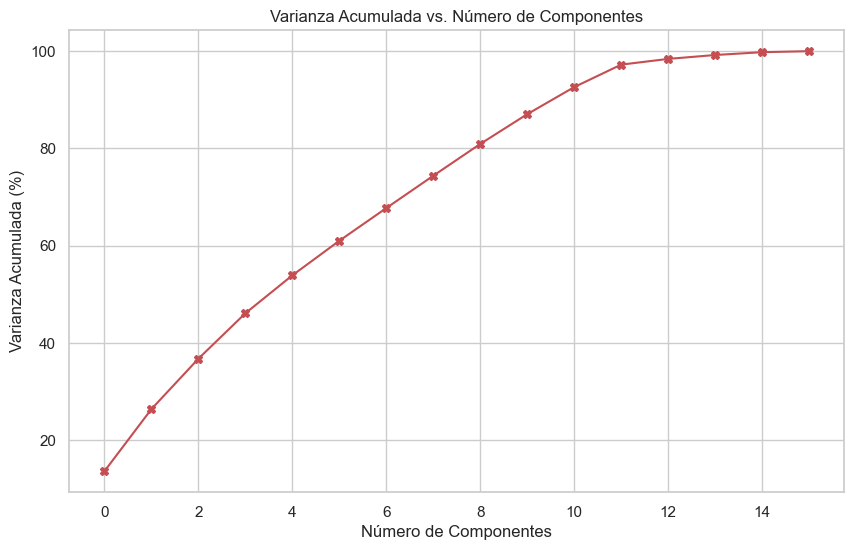

In [30]:
 # Chaeck the best option to reduce the dimensionality, for this we plot the variance w
 cum_var = np.cumsum(np.round(explained_variance , decimals = 4) * 100) # np.cumsum is the cumulative s
 # Show results
 for i, acumulado in enumerate(cum_var, start=1):
    print(f"{i} componente: {acumulado:.2f}%")
 plt.figure(figsize=(10, 6))
 plt.plot(cum_var, 'r-x', marker='X')
 plt.xlabel('Número de Componentes')
 plt.ylabel('Varianza Acumulada (%)')
 plt.title('Varianza Acumulada vs. Número de Componentes')
 plt.grid(True)
 plt.show()

In [31]:
 x_scaler_pca.head()

0         1         2         3         4         5         6   \
0 -1.724920 -1.470165 -0.174439 -0.429371 -0.772757  0.535904  0.419312   
1 -1.652907  1.705515  0.357283 -0.675235  2.512174 -1.031369 -0.308217   
2 -1.166926  3.825566  2.715821 -0.227997  3.092631 -0.902635 -0.221167   
3 -0.556131  3.870965  2.726736 -0.310790  3.238991 -1.231518 -0.381033   
4 -1.913314 -1.085603 -0.070519 -0.723962  0.230837 -0.474447 -0.601190   

         7         8         9         10        11        12        13  \
0 -0.093636  0.798170 -0.035448 -1.365324 -0.273315 -0.008884 -0.090387   
1  0.020795 -0.452712 -0.675475 -0.267678 -1.946655  2.296162  0.302165   
2 -0.028197 -0.554800  1.044452  0.118415  0.608589 -0.529444  0.097541   
3 -0.029209 -0.591772  0.567367 -0.515803  0.964558 -0.482745 -0.127960   
4  0.549383 -1.267795 -1.082164  0.755275 -0.063005  0.632578 -0.063879   

         14        15  
0  0.006431 -0.006761  
1 -0.472292  0.155261  
2 -0.584118 -0.215219  
3  0.451344 -0.168267  
4  0.003858 -0.024390

# 3. BUILDING MODEL - LOGISTIC REGRESSION

In [32]:
# Separate data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaler_pca, y, test_size = 0.2)

In [33]:
 df['loan_status'].value_counts()

loan_status
0    22308
1     6187
Name: count, dtype: int64

In [34]:
# Balancing data in loan_status - Oversampling
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 6)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)
print(len(x_train_sm))
print(len(y_train_sm))

35810
35810


In [35]:
# Balancing data in loan_status - undersampling
rus = RandomUnderSampler(sampling_strategy='majority')
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)
print(len(x_train_us))
print(len(y_train_us))

9782
9782


In [36]:
# Logistic model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid') # The sigmoid function transforms
 ])
# We compile the model, we create the requirements with which we will evaluate the mod
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
 )

# Train model
model.fit(
    x_train_sm,
    y_train_sm,
    epochs = 100,
    batch_size = 32,
    verbose = 0
 )

In [37]:
 # Evaluate model with test set (x_test and y_test)
 loss, accuracy = model.evaluate(x_test, y_test)
 print(f'Model accuracy : {accuracy*100:.2f}%')
 print(f'Average error committed by the model: {loss:.3f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8022 - loss: 0.4590
Model accuracy : 79.87%
Average error committed by the model: 0.463


In [39]:
# Prediction with x_train to compare results with y_train
y_pred_train = model.predict(x_train_sm)

1120/1120 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step


In [41]:
# y_train_sm original
y_train_sm_original = np.array(y_train_sm)

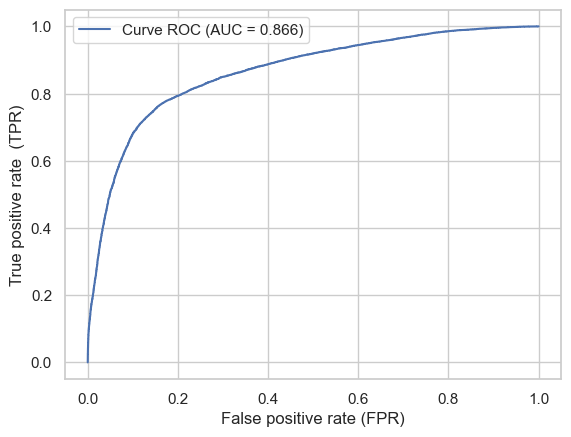

An AUC of 0.5 indicates that the model is no better than random at distinguishi
An AUC of 1 indicates that the model is perfect at distinguishing between class


In [43]:
 # Curve ROC (Receiver Operating Characteristic)
 fpr, tpr, _ = roc_curve(y_train_sm_original, y_pred_train)
 # Calculate the area under the ROC curve
 auc_score = auc(fpr, tpr)
 # Plot
 plt.plot(fpr, tpr, label='Curve ROC (AUC = {:.3f})'.format(auc_score))
 plt.xlabel('False positive rate (FPR)')
 plt.ylabel('True positive rate  (TPR)')
 plt.legend()
 plt.show()
 # Show results
 print('An AUC of 0.5 indicates that the model is no better than random at distinguishi')
 print('An AUC of 1 indicates that the model is perfect at distinguishing between class')


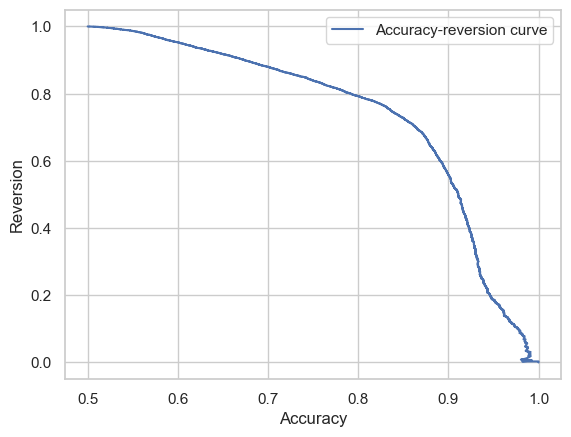

An ideal model would have a precision-recall curve that approaches th


In [44]:
 # Calculate accuracy and revocation
 precision, recall, _ = precision_recall_curve(y_train_sm_original, y_pred_train)
 # Plot
 plt.plot(precision, recall, label='Accuracy-reversion curve')
 plt.xlabel('Accuracy')
 plt.ylabel('Reversion')
 plt.legend()
 plt.show()
 # Precision: It focuses on the accuracy of positive predictions. It measures how well 
# Recall: It focuses on the completeness of positive predictions. It measures how well
 # The main difference between precision and recall lies in their focus:
 # Precision: It focuses on the accuracy of positive predictions. It measures how well 
# Recall: It focuses on the completeness of positive predictions. It measures how well
 # In other words, precision cares about how many of the positive predictions are actua
 print('An ideal model would have a precision-recall curve that approaches th')

In [45]:
 # Create the confusion matrix
 confusion_matrix = confusion_matrix(y_train_sm, y_pred_train > 0.5)
 # Print the confusion matrix
 print(confusion_matrix)

[[14689  3216]
 [ 3916 13989]]


In [49]:
print('___________________________________________________________________')
print('13,377: Correctly predicted positive cases (True Positives)')
print('4,440: Incorrectly predicted positive cases (False Positives)')
print('3,941: Incorrectly predicted negative cases (False Negatives)')
print('13,876: Correctly predicted negative cases (True Negatives)')
print('___________________________________________________________________')


___________________________________________________________________
13,377: Correctly predicted positive cases (True Positives)
4,440: Incorrectly predicted positive cases (False Positives)
3,941: Incorrectly predicted negative cases (False Negatives)
13,876: Correctly predicted negative cases (True Negatives)
___________________________________________________________________


In [46]:
 y_pred_binario = model.predict(x_test) > 0.5

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
 f1 = f1_score(y_test, y_pred_binario, average='binary')  # 'binary' para clases desequ
 print(f"F1-score: {f1}")

F1-score: 0.6303577183370931
